<a href="https://colab.research.google.com/github/gppooja/gppooja/blob/main/Loan_Prediction_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Scikit Learn - Machine Learning with Python


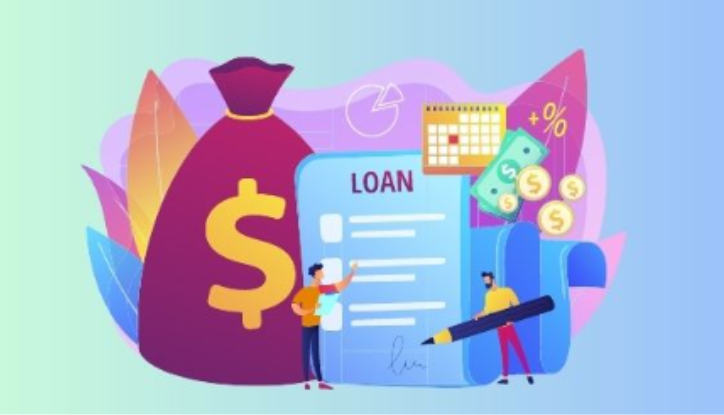

The following topics are covered in this tutorial:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation & test sets
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a $(0,1)$ range
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set


## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to apply _logistic regression_ to a real-world dataset from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Loan Prediction dataset](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset)  the loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution.


## Linear Regression vs. Logistic Regression

 Identifying whether a given problem is a _classfication_ or _regression_ problem is an important first step in machine learning.


### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">




### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_.Logistic regression can also be applied to multi-class classification problems, with a few modifications.


### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://i.imgur.com/g32CoIy.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)).

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

## Downloading the Data

We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. Let's install and import `opendatasets`.

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.__version__

'0.1.22'

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset'


Let's load the data from loan_approval_dataset.csv using Pandas.




In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


The dataset contains over 4269 rows and 13 columns. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. Our objective is to create a model to predict the value in the column `loan status`.


Let's check the data types and missing values in the various columns.

In [ ]:
data.head(8)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,1
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.columns = data.columns.str.replace(' ', '')


## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')

In [ ]:
px.histogram(data, x ='no_of_dependents',color='loan_status')

In [ ]:
px.histogram(data, x ='education',color='loan_status')

<Axes: xlabel='loan_amount', ylabel='Count'>

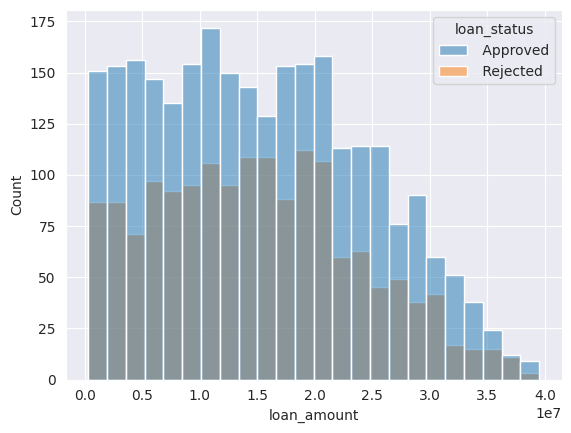

In [ ]:
sns.histplot(data, x='loan_amount', hue='loan_status')


In [ ]:
px.scatter(data.sample(2500),
           x= 'residential_assets_value',
           y = 'commercial_assets_value',
           color = 'loan_status')

<Axes: xlabel='cibil_score', ylabel='loan_amount'>

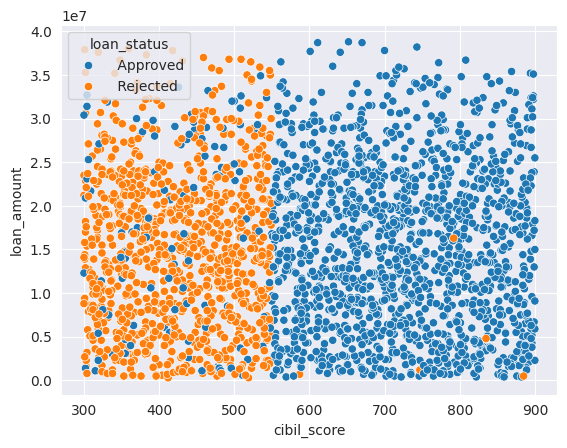

In [ ]:
sns.scatterplot(data.sample(2500),
x="cibil_score",
y="loan_amount",
hue="loan_status")

<Axes: xlabel='income_annum', ylabel='loan_amount'>

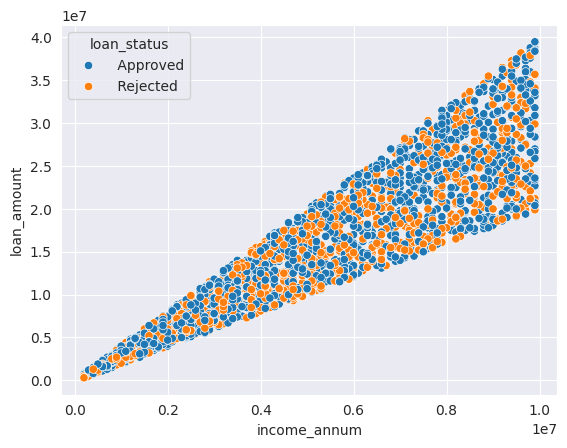

In [ ]:
sns.scatterplot(data.sample(2500),
x="income_annum",
y="loan_amount",
hue="loan_status")

In [ ]:
data['loan_status'] = data['loan_status'].replace({' Rejected':0,' Approved':1})

<ipython-input-18-422191784de6>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


## Training Sets and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.

2. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.






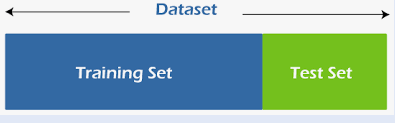

As a general rule of thumb you can use around 80% of the data for the training set and 20% for the test set.

When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating traing sets and test sets. This can be done using the `train_test_split` utility from `scikit-learn`

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state=42)

In [ ]:
train_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1675,1676,5,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000,1
1164,1165,0,Not Graduate,Yes,9600000,34000000,12,710,23800000,10300000,38100000,7800000,1
192,193,1,Graduate,No,800000,2900000,8,682,2200000,1100000,2900000,700000,1
910,911,2,Graduate,Yes,4900000,13100000,18,754,8200000,3300000,16500000,7200000,1
567,568,5,Graduate,Yes,3000000,11100000,12,441,8500000,2500000,7300000,2000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,3445,0,Graduate,Yes,1300000,4700000,16,530,3200000,1000000,3800000,800000,0
466,467,5,Not Graduate,Yes,500000,1800000,18,411,1000000,500000,1300000,200000,0
3092,3093,4,Not Graduate,Yes,8600000,20600000,16,449,10800000,10600000,28700000,5400000,0
3772,3773,2,Not Graduate,Yes,7000000,21400000,12,541,3700000,1300000,19800000,9600000,0


In [ ]:
test_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1703,1704,5,Graduate,No,5400000,19700000,20,423,6500000,10000000,15700000,7300000,0
1173,1174,2,Graduate,No,5900000,14000000,8,599,4700000,9500000,17800000,6700000,1
308,309,3,Graduate,No,9600000,19900000,14,452,4200000,16200000,28500000,6600000,0
1322,1323,2,Graduate,No,6200000,23400000,8,605,10000000,10800000,21800000,9200000,1
3271,3272,3,Not Graduate,Yes,5800000,14100000,12,738,11700000,4400000,15400000,8400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,913,4,Graduate,No,2500000,5400000,10,592,3400000,1500000,9900000,2900000,1
443,444,2,Graduate,No,7700000,16700000,6,555,12900000,2900000,18100000,8500000,1
1483,1484,5,Not Graduate,Yes,5600000,11500000,4,695,9500000,7100000,11700000,7800000,1
668,669,4,Not Graduate,No,2200000,8600000,20,373,4100000,1300000,5900000,1400000,0


In [ ]:
train_inputs = train_df.iloc[:,:12]
train_targets = train_df['loan_status']
test_inputs = test_df.iloc[:,:12]
test_targets = test_df['loan_status']


In [ ]:
print('train_df.shape:',train_df.shape)
print('test_df.shape:',test_df.shape)

train_df.shape: (3415, 13)
test_df.shape: (854, 13)


While not a perfect 80-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

In [ ]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [ ]:
px.histogram(data, x ='residential_assets_value',color='loan_status')

In [ ]:
px.histogram(data, x ='commercial_assets_value',color='loan_status')

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset,  since we only want to loan status conditions to make a prediction about loan it will approved or rejected .

Let's create a list of input columns, and also identify the target column.

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = "loan_status"

In [ ]:
print(input_cols)

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [ ]:
target_col

'loan_status'

We can now create inputs and targets for the training and test sets for further processing and model training.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,5,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,0,Not Graduate,Yes,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,1,Graduate,No,800000,2900000,8,682,2200000,1100000,2900000,700000
910,2,Graduate,Yes,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,5,Graduate,Yes,3000000,11100000,12,441,8500000,2500000,7300000,2000000
...,...,...,...,...,...,...,...,...,...,...,...
3444,0,Graduate,Yes,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,5,Not Graduate,Yes,500000,1800000,18,411,1000000,500000,1300000,200000
3092,4,Not Graduate,Yes,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,2,Not Graduate,Yes,7000000,21400000,12,541,3700000,1300000,19800000,9600000


Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
numeric_cols

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [ ]:
categorical_cols

['education', 'self_employed']

Let's view some statistics for the numeric columns.

In [ ]:
train_inputs[numeric_cols].describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3415.000000,3.415000e+03,3.415000e+03,3415.000000,3415.000000,3.415000e+03,3.415000e+03,3.415000e+03,3.415000e+03
mean,2.434261,5.061845e+06,1.517362e+07,10.919473,600.263543,7.470952e+06,4.954202e+06,1.518381e+07,4.948580e+06
std,1.696596,2.811858e+06,9.064986e+06,5.721133,172.188706,6.543850e+06,4.371297e+06,9.173573e+06,3.233303e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.800000e+06,6.000000,454.000000,2.100000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2.000000,5.100000e+06,1.460000e+07,10.000000,603.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.500000e+06
75%,4.000000,7.500000e+06,2.145000e+07,16.000000,747.500000,1.120000e+07,7.550000e+06,2.180000e+07,7.000000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
train_inputs[categorical_cols].nunique()

,0
education,2
self_employed,2


In [ ]:
data[categorical_cols].nunique()

,0
education,2
self_employed,2


In [ ]:
data.shape

(4269, 13)

In [ ]:
data[numeric_cols].isna().sum()

,0
no_of_dependents,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0
bank_asset_value,0


## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [ ]:
train_inputs[numeric_cols].describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000
mean,0.486852,0.501221,0.379429,0.495526,0.500439,0.259279,0.255371,0.382617,0.336638
std,0.339319,0.289882,0.231250,0.317841,0.286981,0.224104,0.225325,0.235825,0.219953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.257732,0.191327,0.222222,0.256667,0.075342,0.067010,0.185090,0.156463
50%,0.400000,0.505155,0.364796,0.444444,0.505000,0.195205,0.190722,0.367609,0.306122
75%,0.800000,0.752577,0.539541,0.777778,0.745833,0.386986,0.389175,0.552699,0.476190
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(data[numeric_cols])

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

We can now separately scale the training and test sets using the `transform` method of `scaler`.

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000
mean,0.486852,0.501221,0.379429,0.495526,0.500439,0.259279,0.255371,0.382617,0.336638
std,0.339319,0.289882,0.231250,0.317841,0.286981,0.224104,0.225325,0.235825,0.219953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.257732,0.191327,0.222222,0.256667,0.075342,0.067010,0.185090,0.156463
50%,0.400000,0.505155,0.364796,0.444444,0.505000,0.195205,0.190722,0.367609,0.306122
75%,0.800000,0.752577,0.539541,0.777778,0.745833,0.386986,0.389175,0.552699,0.476190
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use label encoding for categorical columns.

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.


We can perform label encoding using the `LabelEncoder` class from `sklearn.preprocessing`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
categorical_cols

['education', 'self_employed']

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [ ]:
train_inputs['education'] = encoder.fit_transform(train_inputs['education'])

In [ ]:
train_inputs['self_employed'] = encoder.fit_transform(train_inputs['self_employed'])

In [ ]:
test_inputs['education'] = encoder.fit_transform(test_inputs['education'])

In [ ]:
test_inputs['self_employed'] = encoder.fit_transform(test_inputs['self_employed'])

In [ ]:
test_inputs

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1703,1.0,0,0,0.536082,0.494898,1.000000,0.205000,0.226027,0.515464,0.395887,0.496599
1173,0.4,0,0,0.587629,0.349490,0.333333,0.498333,0.164384,0.489691,0.449871,0.455782
308,0.6,0,0,0.969072,0.500000,0.666667,0.253333,0.147260,0.835052,0.724936,0.448980
1322,0.4,0,0,0.618557,0.589286,0.333333,0.508333,0.345890,0.556701,0.552699,0.625850
3271,0.6,1,1,0.577320,0.352041,0.555556,0.730000,0.404110,0.226804,0.388175,0.571429
...,...,...,...,...,...,...,...,...,...,...,...
912,0.8,0,0,0.237113,0.130102,0.444444,0.486667,0.119863,0.077320,0.246787,0.197279
443,0.4,0,0,0.773196,0.418367,0.222222,0.425000,0.445205,0.149485,0.457584,0.578231
1483,1.0,1,1,0.556701,0.285714,0.111111,0.658333,0.328767,0.365979,0.293059,0.530612
668,0.8,1,0,0.206186,0.211735,1.000000,0.121667,0.143836,0.067010,0.143959,0.095238


In [ ]:
train_inputs

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,1.0,1,0,0.793814,0.755102,0.222222,0.446667,0.202055,0.716495,0.401028,0.591837
1164,0.0,1,1,0.969072,0.859694,0.555556,0.683333,0.818493,0.530928,0.971722,0.530612
192,0.2,0,0,0.061856,0.066327,0.333333,0.636667,0.078767,0.056701,0.066838,0.047619
910,0.4,0,1,0.484536,0.326531,0.888889,0.756667,0.284247,0.170103,0.416452,0.489796
567,1.0,0,1,0.288660,0.275510,0.555556,0.235000,0.294521,0.128866,0.179949,0.136054
...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,0,1,0.113402,0.112245,0.777778,0.383333,0.113014,0.051546,0.089974,0.054422
466,1.0,1,1,0.030928,0.038265,0.888889,0.185000,0.037671,0.025773,0.025707,0.013605
3092,0.8,1,1,0.865979,0.517857,0.777778,0.248333,0.373288,0.546392,0.730077,0.367347
3772,0.4,1,1,0.701031,0.538265,0.555556,0.401667,0.130137,0.067010,0.501285,0.653061


In [ ]:
train_targets.replace({'Rejected':0,'Approved':1},inplace=True)

In [ ]:
train_targets

,loan_status
1675,1
1164,1
192,1
910,1
567,0
...,...
3444,0
466,0
3092,0
3772,0


In [ ]:
train_inputs

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,1.0,1,0,0.793814,0.755102,0.222222,0.446667,0.202055,0.716495,0.401028,0.591837
1164,0.0,1,1,0.969072,0.859694,0.555556,0.683333,0.818493,0.530928,0.971722,0.530612
192,0.2,0,0,0.061856,0.066327,0.333333,0.636667,0.078767,0.056701,0.066838,0.047619
910,0.4,0,1,0.484536,0.326531,0.888889,0.756667,0.284247,0.170103,0.416452,0.489796
567,1.0,0,1,0.288660,0.275510,0.555556,0.235000,0.294521,0.128866,0.179949,0.136054
...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,0,1,0.113402,0.112245,0.777778,0.383333,0.113014,0.051546,0.089974,0.054422
466,1.0,1,1,0.030928,0.038265,0.888889,0.185000,0.037671,0.025773,0.025707,0.013605
3092,0.8,1,1,0.865979,0.517857,0.777778,0.248333,0.373288,0.546392,0.730077,0.367347
3772,0.4,1,1,0.701031,0.538265,0.555556,0.401667,0.130137,0.067010,0.501285,0.653061


## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression(solver='saga')

In [ ]:
lg_model.fit(train_inputs, train_targets)

LogisticRegression(solver='saga')

In [ ]:
predictions_lg = lg_model.predict(test_inputs)

In [ ]:
test_targets

,loan_status
1703,0
1173,1
308,0
1322,1
3271,1
...,...
912,1
443,1
1483,1
668,0


In [ ]:
predictions_lg

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_targets, predictions_lg)

0.9121779859484778

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test_targets, predictions_lg)

array([[278,  40],
       [ 35, 501]])

## Training a DecisionTree Model

A decision tree is commonly used in machine learning to model and predict outcomes based on input data. It is a tree-like structure where each internal node tests on attribute, each branch corresponds to attribute value and each leaf node represents the final decision or prediction. The decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.


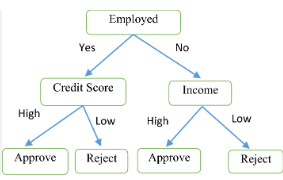

To train a DecisionTree model, we can use the `DecisionTreeClassifier` class from Scikit-learn.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(train_inputs, train_targets)

DecisionTreeClassifier()

In [ ]:
predictions_dt = dt_model.predict(test_inputs)

In [ ]:
accuracy_score(test_targets, predictions_dt)

0.9718969555035128

## Training a RandomForestClassifier Model

Random Forest algorithm  works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance.

In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(train_inputs, train_targets)

RandomForestClassifier()

In [ ]:
prdictions_rf = rf_model.predict(test_inputs)

In [ ]:
accuracy_score(test_targets, prdictions_rf)

0.9800936768149883